In [6]:
import json
import os
import pandas as pd
import sys

In [7]:
file = []
for line in open('D:/Python/Datasets/v1.0/train/nq-train-00.jsonl'):
    file.append(json.loads(line))
    print(file[0].keys())
    break

dict_keys(['annotations', 'document_html', 'document_title', 'document_tokens', 'document_url', 'example_id', 'long_answer_candidates', 'question_text', 'question_tokens'])


In [8]:
print(file[0].get('question_text'))

when is the last episode of season 8 of the walking dead


In [9]:
print(file[0].get('document_url'))

https://en.wikipedia.org//w/index.php?title=The_Walking_Dead_(season_8)&amp;oldid=828222625


In [10]:
print(file[0].get('document_title'))

The Walking Dead (season 8)


<!DOCTYPE html>
<HTML class="client-js ve-not-available" lang="en" dir="ltr"><HEAD>

<TITLE>The Walking Dead (season 8) - Wikipedia</TITLE>


<LINK rel="stylesheet" href="/w/load.php?debug=false&amp;lang=en&amp;modules=ext.cite.styles%7Cext.timeline.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cmediawiki.legacy.commonPrint%2Cshared%7Cmediawiki.sectionAnchor%7Cmediawiki.skinning.interface%7Cskins.vector.styles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" />

<STYLE>
.referencetooltip{position:absolute;list-style:none;list-style-image:none;opacity:0;font-size:10px;margin:0;z-index:5;padding:0}.referencetooltip li{border:#080086 2px solid;max-width:260px;padding:10px 8px 13px 8px;margin:0px;background-color:#F7F7F7;-webkit-box-shadow:2px 4px 2px rgba(0,0,0,0.3);-moz-box-shadow:2px 4px 2px rgba(0,0,0,0.3);box-shadow:2px 4px 2px rgba(0,0,0,0.3)}.referencetooltip li+li{margin-left:7px;margin-top:-2px;border:0;padding:0;heig
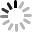

In [11]:
print(file[0].get('document_html'))

In [24]:
print(type(file[0].get('document_html')))

<class 'str'>


In [16]:
print(file[0].get('question_tokens'))

['when', 'is', 'the', 'last', 'episode', 'of', 'season', '8', 'of', 'the', 'walking', 'dead']


In [ ]:
print(file[0].get('document_tokens'))

In [18]:
print(file[0].get('annotations'))

[{'annotation_id': 6782080525527814293, 'long_answer': {'candidate_index': 92, 'end_byte': 96948, 'end_token': 3538, 'start_byte': 82798, 'start_token': 2114}, 'short_answers': [{'end_byte': 96731, 'end_token': 3525, 'start_byte': 96715, 'start_token': 3521}], 'yes_no_answer': 'NONE'}]


In [13]:
text = []
s_Start = file[0].get('annotations')[0].get('short_answers')[0].get('start_token')
s_End = file[0].get('annotations')[0].get('short_answers')[0].get('end_token')
l_Start = file[0].get('annotations')[0].get('long_answer').get('start_token')
l_End = file[0].get('annotations')[0].get('long_answer').get('end_token')
print(s_Start, s_End)
print(type(s_Start))


3521 3525
<class 'int'>


In [14]:
document = []
document_Token = []

for indexs in file[0].get('document_tokens'):
    if indexs.get('html_token') == False:
        document.append(indexs.get('token'))
    document_Token.append(indexs.get('token'))

In [15]:
print(len(document), len(document_Token))

5513 7259


In [16]:
print(document_Token[s_Start:s_End])
longDocument = []
for index in range(l_Start, l_End):
    if file[0].get('document_tokens')[index].get('html_token') == False:
        longDocument.append(file[0].get('document_tokens')[index].get('token'))
print(' '.join(longDocument))

['March', '18', ',', '2018']
No . overall No. in season Title Directed by Written by Original air date U.S. viewers ( millions ) 100 `` Mercy '' Greg Nicotero Scott M. Gimple October 22 , 2017 ( 2017 - 10 - 22 ) 11.44 Rick , Maggie , and Ezekiel rally their communities together to take down Negan . Gregory attempts to have the Hilltop residents side with Negan , but they all firmly stand behind Maggie . The group attacks the Sanctuary , taking down its fences and flooding the compound with walkers . With the Sanctuary defaced , everyone leaves except Gabriel , who reluctantly stays to save Gregory , but is left behind when Gregory abandons him . Surrounded by walkers , Gabriel hides in a trailer , where he is trapped inside with Negan . 101 `` The Damned '' Rosemary Rodriguez Matthew Negrete & Channing Powell October 29 , 2017 ( 2017 - 10 - 29 ) 8.92 Rick 's forces split into separate parties to attack several of the Saviors ' outposts , during which many members of the group are kille

In [17]:
from bert import bert_tokenization
tk = bert_tokenization.FullTokenizer(vocab_file='vocab.txt', do_lower_case=True)
print(tk.tokenize(' '.join(longDocument)))

['no', '.', 'overall', 'no', '.', 'in', 'season', 'title', 'directed', 'by', 'written', 'by', 'original', 'air', 'date', 'u', '.', 's', '.', 'viewers', '(', 'millions', ')', '100', '`', '`', 'mercy', "'", "'", 'greg', 'nico', '##ter', '##o', 'scott', 'm', '.', 'gi', '##mple', 'october', '22', ',', '2017', '(', '2017', '-', '10', '-', '22', ')', '11', '.', '44', 'rick', ',', 'maggie', ',', 'and', 'ezekiel', 'rally', 'their', 'communities', 'together', 'to', 'take', 'down', 'ne', '##gan', '.', 'gregory', 'attempts', 'to', 'have', 'the', 'hilltop', 'residents', 'side', 'with', 'ne', '##gan', ',', 'but', 'they', 'all', 'firmly', 'stand', 'behind', 'maggie', '.', 'the', 'group', 'attacks', 'the', 'sanctuary', ',', 'taking', 'down', 'its', 'fences', 'and', 'flooding', 'the', 'compound', 'with', 'walkers', '.', 'with', 'the', 'sanctuary', 'def', '##ace', '##d', ',', 'everyone', 'leaves', 'except', 'gabriel', ',', 'who', 'reluctantly', 'stays', 'to', 'save', 'gregory', ',', 'but', 'is', 'left'